<html>
<div style="background-image: linear-gradient(to left, rgb(255, 255, 255), rgb(138, 136, 136)); width: 600px; vertical-align: middle; height: 40px; margin: 10px;">
<h1 style="font-family: Georgia; color: black;">AI-Fall 01-CA4</h1>
</div>
<div style="background-image: linear-gradient(to left, rgb(255, 255, 255), rgb(138, 136, 136)); width: 500px; margin: 10px;">
  <img src="https://upload.wikimedia.org/wikipedia/en/thumb/f/fd/University_of_Tehran_logo.svg/225px-University_of_Tehran_logo.svg.png" width=60px width=auto style="padding:10px; vertical-align: middle;">
  <span style="font-family: Georgia; font-size:30px; color: black;">University of Tehran </span>
</div>
<div style=" background-image: linear-gradient(to left, rgb(255, 255, 255), rgb(138, 136, 136)); width: 400px; height: 30px; margin: 10px;">
  <span style="font-family: Georgia; font-size:15pt; color: black; vertical-align: middle;">Saman Eslami Nazari - std id: 810199375 </span>
</div>
</html>

# Exploratory Data Analysis

First, lets read and store the dataset with `pandas`.

In [98]:
import pandas as pd

DATASET_PATH = "./dataset/diabetes.csv"

df = pd.read_csv(DATASET_PATH)

1. Observe the structure of the data using `info` and `describe` methods.

In [99]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               635 non-null    float64
 1   Glucose                   654 non-null    float64
 2   BloodPressure             680 non-null    float64
 3   SkinThickness             624 non-null    float64
 4   Insulin                   680 non-null    float64
 5   BMI                       684 non-null    float64
 6   DiabetesPedigreeFunction  590 non-null    float64
 7   Age                       655 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


None

The `info` method will show us the type and number of valid elements in each column. It also gives information about the memory usage.
This method is useful when we want to take a look at the columns we have.

In [100]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,635.000000,654.000000,680.000000,624.000000,680.000000,684.000000,590.000000,655.000000,768.000000
mean,3.700787,113.422018,68.786765,20.386218,80.123529,32.083626,0.466676,33.157252,0.348958
std,3.518126,202.816831,19.724841,15.987049,115.681140,7.800741,0.322408,13.829831,0.476951
min,-22.000000,-5000.000000,-2.000000,0.000000,0.000000,0.000000,0.078000,-150.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.375000,0.243250,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,34.000000,32.300000,0.368000,29.000000,0.000000
75%,6.000000,140.750000,80.000000,32.000000,129.250000,36.600000,0.611500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.329000,81.000000,1.000000


The `describe` method gives more information about each column in the data frame. It gives us some statistical data about columns and is useful when it comes to inspecting the data.

2. Find the count and rate of the missing data for each feature.

The missing values count:

In [101]:
df.isna().sum()

Pregnancies                 133
Glucose                     114
BloodPressure                88
SkinThickness               144
Insulin                      88
BMI                          84
DiabetesPedigreeFunction    178
Age                         113
Outcome                       0
dtype: int64

The missing values rate:

In [102]:
df.isna().sum() / df.shape[0]

Pregnancies                 0.173177
Glucose                     0.148438
BloodPressure               0.114583
SkinThickness               0.187500
Insulin                     0.114583
BMI                         0.109375
DiabetesPedigreeFunction    0.231771
Age                         0.147135
Outcome                     0.000000
dtype: float64

3. Draw the correlation of the features.

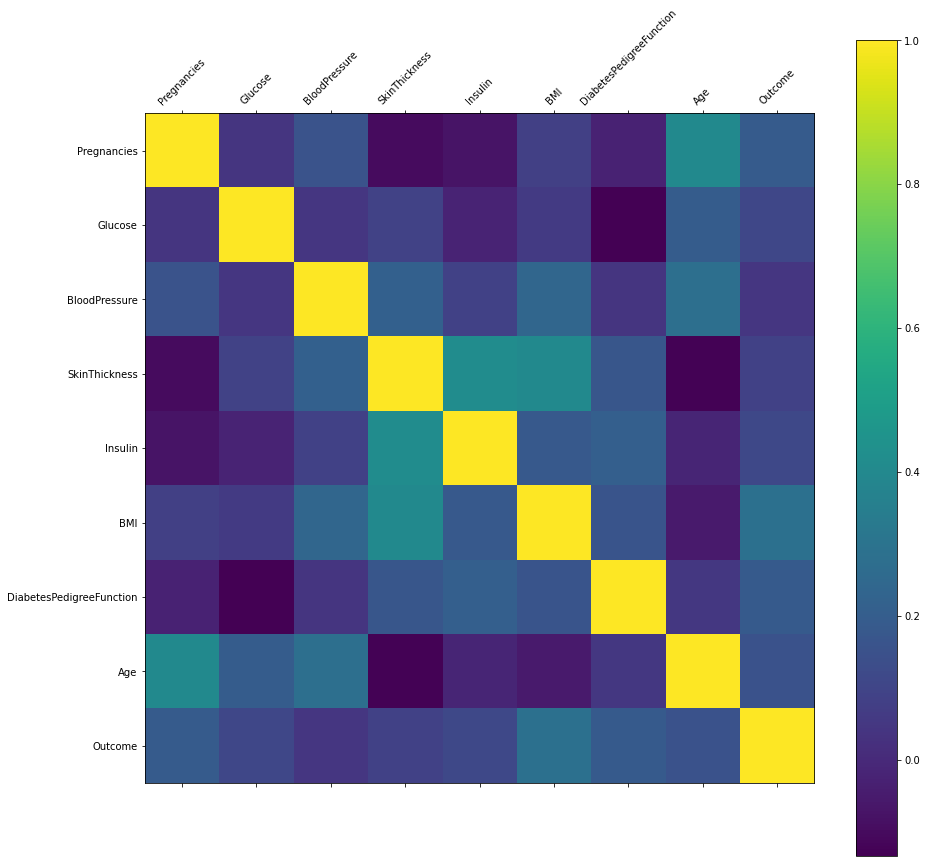

In [103]:
import matplotlib.pyplot as plt
from matplotlib.axes import Axes

alpha = list(df)

fig, ax = plt.subplots(figsize=(15,15))
heat_map = ax.matshow(df.corr())

ax.set_xticks(range(0, len(alpha)), labels=alpha)
ax.set_yticks(range(0, len(alpha)), labels=alpha)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.colorbar(heat_map)
plt.show()
plt.close()

To see what features have the most correlation with the outcome, we can simply use the outcome row in `df.corr()`.

In [104]:
display(df.corr()['Outcome'].sort_values(ascending=False))

Outcome                     1.000000
BMI                         0.284374
Pregnancies                 0.193306
DiabetesPedigreeFunction    0.186958
Age                         0.152902
Insulin                     0.112239
Glucose                     0.105518
SkinThickness               0.086170
BloodPressure               0.044803
Name: Outcome, dtype: float64

So the three features that has the most correlation with the outcome are BMI, Pregnancies and DiabetesPedigreeFunction.

4. Count the number of occurrences of unique values in each feature.

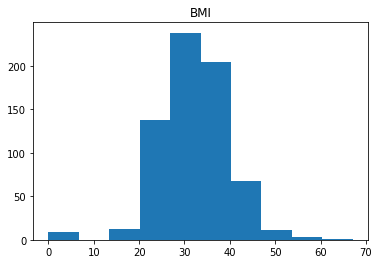

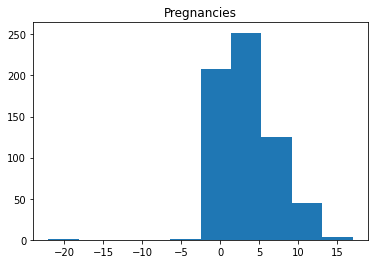

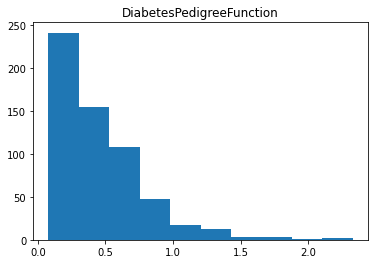

In [105]:
import math
import numpy as np

top_corr_cols = df.corr()['Outcome'].sort_values(ascending=False).index.to_list()
top_corr_cols = top_corr_cols[1:4]

for column in top_corr_cols:
    data = df[column]
    plt.figure()
    plt.hist(data)
    plt.title(column)
    plt.show()


5. Visualize features and outcome relations using hexbin and scatter diagrams.

Here, I will show scatter and hexbin plots for the 3 diagrams that had the most correlation with the 'Outcome'.

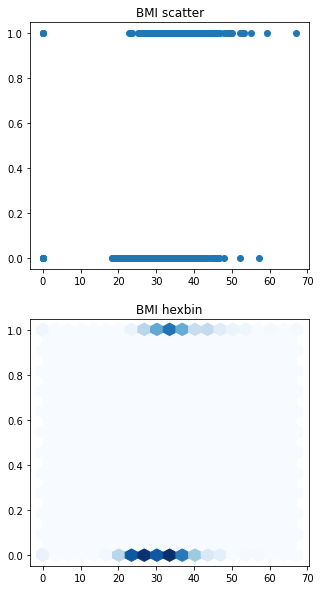

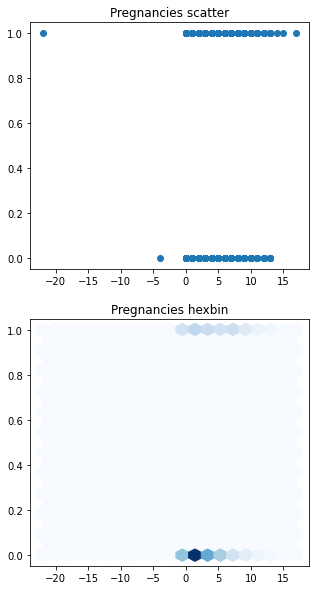

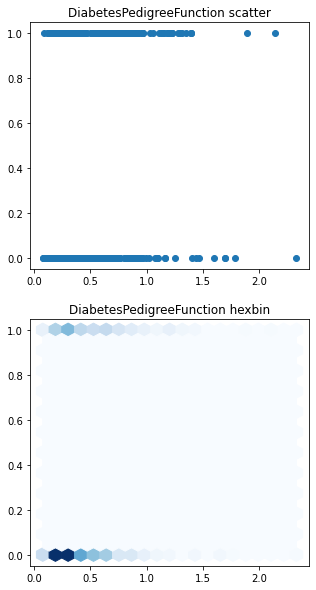

In [106]:
for column in top_corr_cols:
    fig, axes = plt.subplots(nrows=2, figsize=(5, 10))
    axes[0].scatter(df[column], df['Outcome'])
    axes[0].set_title(f"{column} scatter")
    axes[1].hexbin(df[column], df['Outcome'], gridsize=20, cmap='Blues')
    axes[1].set_title(f"{column} hexbin")

# Preprocessing the Data

1. Describe different  methods for filling in the missing data.

There are three ways to solve the problem of missing data:
1. Simply deleting the data related to the missing values.
2. Using the mean of that feature.
3. Using the most frequent value in the same column.
4. Creating another group that represents the missing values usually under the name of "unspecified" or "unknown".
5. Using imputers that learn from available data and fill the missing values.

2. According to the previous phase, find and solve the features that have a lot of missing values.

First of all, I will detect and replace the values that are out of bound. None of the features can have negative values; Also every feature except 'Pregnancies' and 'DiabetesPedigreeFunction' must have a non-zero value.

In [107]:
df[df < 0] = np.nan
for column in df.columns.drop(['Outcome', 'DiabetesPedigreeFunction', 'Pregnancies']):
    df[column].replace(0, np.nan, inplace=True)

Now the missing percentage of each feature will be as follow:

In [108]:
missing_percentage = (df.isna().sum() / df.shape[0]).sort_values(ascending=False)
print(missing_percentage)

Insulin                     0.542969
SkinThickness               0.429688
DiabetesPedigreeFunction    0.231771
Pregnancies                 0.175781
BloodPressure               0.157552
Glucose                     0.154948
Age                         0.148438
BMI                         0.121094
Outcome                     0.000000
dtype: float64


More than half of the values in 'Insulin' feature are garbage; Also the 'SkinThickness' has a high percentage of missing values. Therefore I will remove these features.

In [109]:
garbage_feature = missing_percentage.head(2).index # Insulin, SkinThickness
df = df.drop(garbage_feature, axis=1)

In [110]:
import math

df.fillna(df.median(), inplace=True)

display(df.isna().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

3. When do we need to apply Normalizing and Standardizing? Do we need it here?

To answer the first question, I quote from [this link](https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff):
> **Normalization** is a good technique to use when you do not know the distribution of your data or when you know the distribution is not Gaussian (a bell curve). Normalization is useful when your data has varying scales and the algorithm you are using does not make assumptions about the distribution of your data, such as k-nearest neighbors and artificial neural networks.<br>
**Standardization** assumes that your data has a Gaussian (bell curve) distribution. This does not strictly have to be true, but the technique is more effective if your attribute distribution is Gaussian. Standardization is useful when your data has varying scales and the algorithm you are using does make assumptions about your data having a Gaussian distribution, such as linear regression, logistic regression, and linear discriminant analysis.

In conclusion, some algorithms fail with large numbers. Here we can use a min max scaler for the features.

In [111]:
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = df.columns.drop('Outcome')

scaler = MinMaxScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

display(df.describe())

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.213006,0.498227,0.492360,0.292391,0.162508,0.196311,0.348958
std,0.180086,0.183007,0.116389,0.132450,0.126871,0.183918,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.374194,0.428571,0.200409,0.082186,0.066667,0.000000
50%,0.176471,0.470968,0.489796,0.290389,0.128832,0.133333,0.000000
75%,0.294118,0.593548,0.551020,0.360429,0.202799,0.300000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


4. What preprocessing methods are useful when it comes to use categorical data?

There are many different methods to encode categorical data. "One hot encoding", "binary encoding", "label encoding", and "frequency encoding" are to name a few. Here we don't need any encoding as there is no feature with nun-numerical value.

5. Is it possible to remove some columns? why?

Yes it is; As mentioned before, 'SkinThickness' and 'Insulin' have a high percentage of missing values and therefore it can be ignored; These features are usually irrelevant to the outcome and can even confuse the model. Also sometimes there are features that are not worth considering because they take too much time to process.

6. What is the split ratio of test and train datasets' size? What methods are there for this purpose.

The ratio depends on the number od samples present in the dataset and the model. If there are several hyperparameters in the model, we'll need a much larger training dataset. If a false prediction can highly affect the models performance, It's better to validate the model after every step in training. We should consider that with less training data, out model will show high variance in training; Also with less testing data, out model's performance will have high variance in statistics. There are several ways to split the dataset; Here are some:
- **Random**: Picking sample random with the specified split ratio. This can cause our training dataset to contain only one class of the outcome and therefore out model will not learn how to predict other classes.
- **Stratified**: This method will make sure that there are as much of the outcome class in the training dataset, as we have specified.
- **Cross validation or K-fold cross validation**: A model will be trained and evaluated K times on different samples.

7. Explain the evaluation dataset.

Evaluation dataset consist samples that will be used during the model training. This is separated from test dataset to avoid overfitting and having a false high accuracy on the test dataset.

In [112]:
from sklearn.model_selection import train_test_split

x_df = df.drop('Outcome', axis=1)
y_df = df['Outcome']

x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.3, random_state=1)

# Training, Evaluation, and Tuning

Confusion matrix is $n\times n$ matrix that $n$ is the number of available classes in our model. One dimension indicates the actual labels and the other is the predicted labels. for example if $i$ is the predicted class label and $j$ is the actual class label, for $i = 0, j = 1$ we have the inputs that were predicted to be in class 0 but actually belong to the class 1.<br>
Before doing anything, I'll write a function to avoid repeating 3 lines of code the do the job for visualizing the confusion matrix.

In [113]:
from sklearn.metrics import ConfusionMatrixDisplay

def confusion_matrix_vis(matrix):
    cm_display = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=['0', '1'])
    cm_display.plot()
    plt.show()

In this part I will train three models to predicts this dataset; Decision trees, K-nearest-neighbors, and logistic regression. I will use the scikit learn library for this purpose.

## Decision Tree

Training decision tree model and using `GridSearchCV` to find the best combination of the hyperparameters.

In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt_features = x_train.columns.to_list()

# dt == decision tree
dt_parameters = {
    'criterion': ['entropy'],
    'max_depth': range(5, 10),
    'min_samples_split': range(5, 10),
    'min_samples_leaf': range(1, 4),
    'random_state': [1]
}

dt_model = DecisionTreeClassifier()
dt_clf = GridSearchCV(dt_model, dt_parameters, scoring='accuracy')


Now lets test our decision tree model.

accuracy: 0.7705627705627706


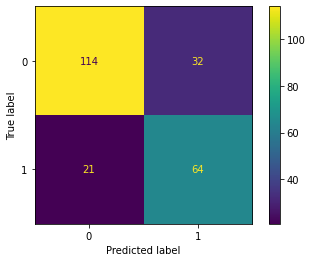

In [115]:
from sklearn.metrics import confusion_matrix, accuracy_score

dt_clf.fit(x_train[dt_features], y_train)
dt_pred = dt_clf.predict(x_test[dt_features])
print('accuracy:', accuracy_score(y_test, dt_pred))
confusion_matrix_vis(confusion_matrix(y_test, dt_pred))


## K-NN

In [116]:
from sklearn.neighbors import KNeighborsClassifier

k_nn_features = x_train.columns.to_list()

k_nn_parameters = {
    'n_neighbors': range(3, 10, 2)
}

k_nn_model = KNeighborsClassifier()
k_nn_clf = GridSearchCV(k_nn_model, k_nn_parameters, scoring='accuracy')

accuracy: 0.7489177489177489


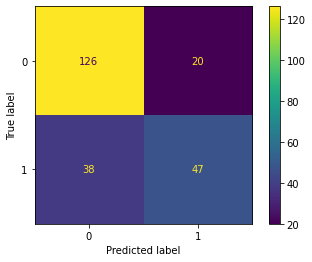

In [117]:
k_nn_clf.fit(x_train[k_nn_features], y_train)
k_nn_pred = k_nn_clf.predict(x_test[k_nn_features])
print('accuracy:', accuracy_score(y_test, k_nn_pred))
confusion_matrix_vis(confusion_matrix(y_test, k_nn_pred))


## Logistic Regression

In [118]:
from sklearn.linear_model import LogisticRegression

lr_features = x_train.columns.tolist()

# lr == logistic regression
lr_clf = LogisticRegression()

accuracy: 0.7748917748917749


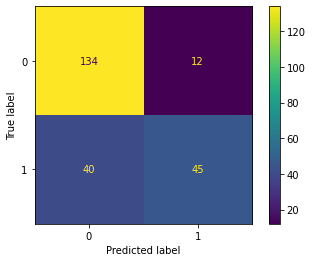

In [119]:
lr_clf.fit(x_train[lr_features], y_train)
lr_pred = lr_clf.predict(x_test[lr_features])
print('accuracy:', accuracy_score(y_test, lr_pred))
confusion_matrix_vis(confusion_matrix(y_test, lr_pred))


### Overfitting and Underfitting

Before examining this section, I will explain the variance and bias:
- **Variance**: The difference between error rate of training data and testing data.
- **Bias**: The error rate of the training data.

#### ***Underfitting***:
Shortly, underfitting means that the model is not behaving well neither on the training data nor on the test data. Reasons for underfitting:
1. High bias and low variance.
2. We don't have enough data to train out model.
3. The model is too simple.
4. We don't have a clean data for training.
#### ***Overfitting***:
Shortly, overfitting happens when the model is doing well on the training data but not on the test data. This can happen when the evaluation technic in training data is different from the unseen data. Reasons for overfitting:
1. High variance and low bias.
2. The model is too complex.
3. The size of the training data.

To see if overfitting or underfitting has happened we can check the measurement on both the training and testing datasets.

In [120]:
dt_train_pred = dt_clf.predict(x_train[dt_features])
print(f"test accuracy: {accuracy_score(y_test, dt_pred)}, train accuracy: {accuracy_score(y_train, dt_train_pred)}")

k_nn_train_pred = k_nn_clf.predict(x_train[k_nn_features])
print(f"test accuracy: {accuracy_score(y_test, k_nn_pred)}, train accuracy: {accuracy_score(y_train, k_nn_train_pred)}")

lr_train_pred = lr_clf.predict(x_train[lr_features])
print(f"test accuracy: {accuracy_score(y_test, lr_pred)}, train accuracy: {accuracy_score(y_train, lr_train_pred)}")


test accuracy: 0.7705627705627706, train accuracy: 0.7988826815642458
test accuracy: 0.7489177489177489, train accuracy: 0.7858472998137802
test accuracy: 0.7748917748917749, train accuracy: 0.7579143389199255


As it can be seen from above, There is not much difference between the results, therefore we have low variance; Also the error rate on train data is low which means that we have a low bias. As a result, neither overfitting nor underfitting has occurred.

# Ensemble Learning

In [123]:
from sklearn.ensemble import RandomForestClassifier

rand_forest_features = x_train.columns.to_list()

rand_forest_parameters = {
    'n_estimators' : range(10, 100, 10),
    'max_depth' : range(2, 10),
    'criterion' : ['gini', 'entropy'],
    'random_state' : [0, 1]
}

rand_forest_model = RandomForestClassifier()
rand_forest_clf = GridSearchCV(rand_forest_model, rand_forest_parameters, scoring='accuracy')

accuracy:  0.7619047619047619


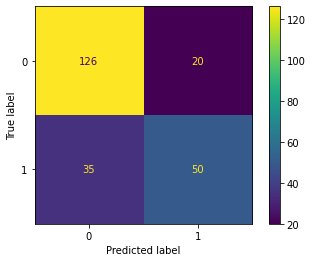

In [124]:
rand_forest_clf.fit(x_train[rand_forest_features], y_train)
rand_forest_pred = rand_forest_clf.predict(x_test[rand_forest_features])

print('accuracy: ', accuracy_score(y_test, rand_forest_pred))
confusion_matrix_vis(confusion_matrix(y_test, rand_forest_pred))


### Random Forest Hyperparameters
The following list contains some of the random forest hyperparameters:
- `n_estimators`
- `criterion`
- `max_depth`
- `min_samples_split`
- `min_samples_leaf`
- `min_weight_fraction_leaf`
- `max_features`
- `max_leaf_nodes`
- `min_impurity_decrease`
<br>
<!-- end of list -->
Here, I will explain the `n_estimators` and the `max_depth`:
- `n_estimators`: This specifies the number of the decision trees that our models is going to create and take them into account.
- `max_depth`: The maximum depth allowed in a single decision tree.

### Random Forest Against Decision Tree

Random forests are designed to reduce the variance in decision tree models. Random forests take a vote between some number of trained decision trees and outputs the class that was chosen by the majority of the decision trees. It is obvious that this technic increases the power of generalizations which leads to lower variance.<br>
To test this claim, I will calculate variance for both the decision tree and the random forest models that I previously used. 

In [126]:
from mlxtend.evaluate import bias_variance_decomp

_, _, rand_forest_variance = bias_variance_decomp(
    rand_forest_model,
    x_train[rand_forest_features].values,
    y_train.values,
    x_test[rand_forest_features].values,
    y_test.values
)

_, _, dt_variance = bias_variance_decomp(
    dt_clf,
    x_train[dt_features].values,
    y_train.values,
    x_test[dt_features].values,
    y_test.values
)

print(f"random forest variance: {rand_forest_variance}, decision tree variance: {dt_variance}")

random forest variance: 0.09688311688311689, decision tree variance: 0.19227272727272726
